In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data_dir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/ind_level_analysis'

In [61]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(10,5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    #l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=2)
    l = ax.legend(loc='center right', bbox_to_anchor=(1, 0.75), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [55]:
figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [5]:
params =glob.glob(os.path.join(data_dir, '*'))

In [9]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

In [15]:
full_data = pd.DataFrame()
c = conds[0]
data = pd.read_csv(c)

In [16]:
data['cond'] = os.path.basename(os.path.splitext(c)[0])

In [17]:
if full_data.empty:
    full_data = data
else:
    full_data = full_data.append(data)

melted_df = pd.DataFrame()

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


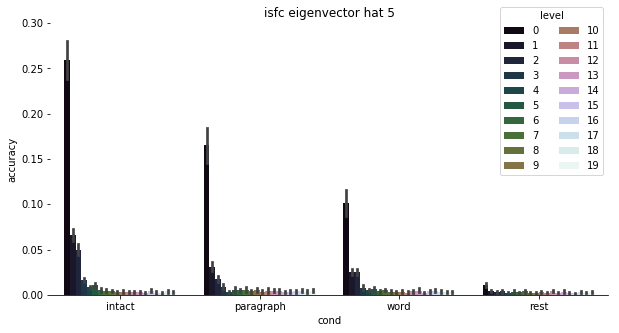

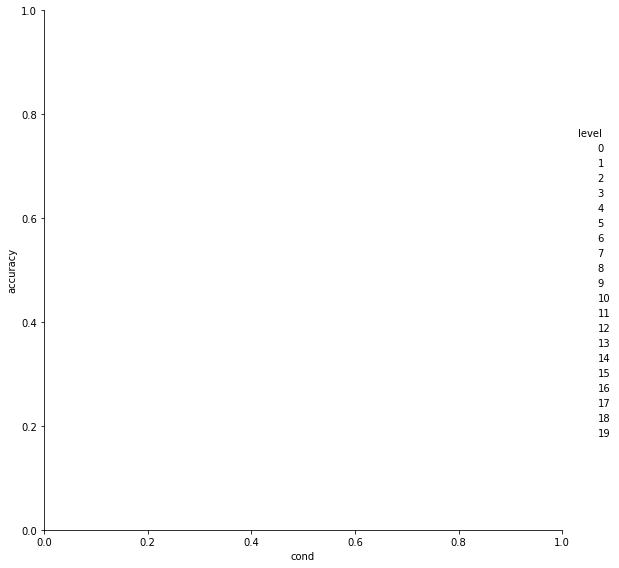

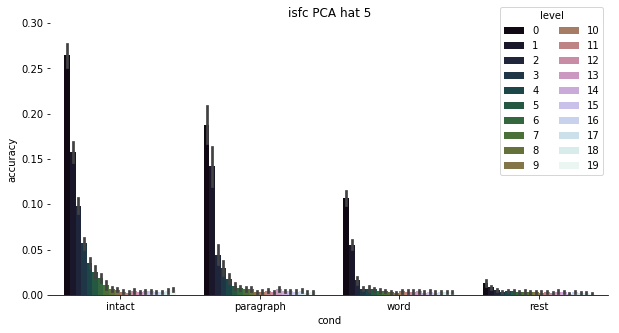

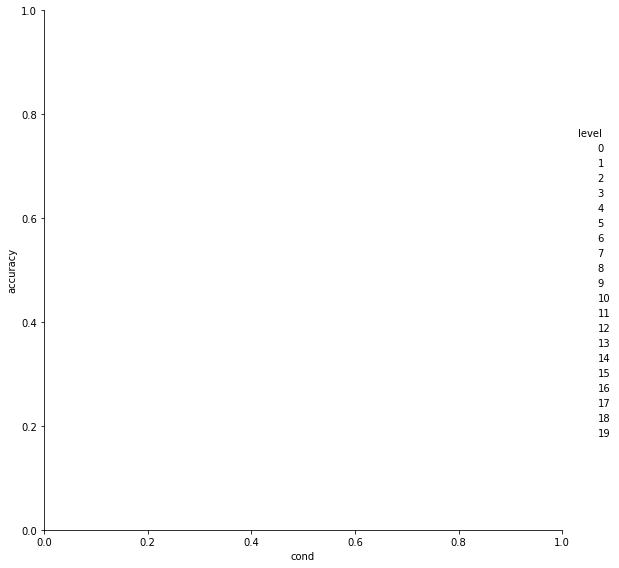

In [62]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + 'accuracy.png')
    grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)

In [20]:
full_data

,Unnamed: 0,rank,accuracy,error,level,folds,iteration,cond
0,0,0.986378,0.276667,0.963067,0,0,0,intact
1,0,0.960444,0.180000,0.866489,1,0,0,intact
2,0,0.874033,0.123333,0.878056,2,0,0,intact
3,0,0.782056,0.063333,0.848489,3,0,0,intact
4,0,0.721300,0.053333,0.842678,4,0,0,intact
5,0,0.588278,0.023333,0.822800,5,0,0,intact
6,0,0.518289,0.016667,0.692333,6,0,0,intact
7,0,0.524933,0.010000,0.676478,7,0,0,intact
8,0,0.503200,0.006667,0.578878,8,0,0,intact
9,0,0.504211,0.006667,0.579000,9,0,0,intact


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


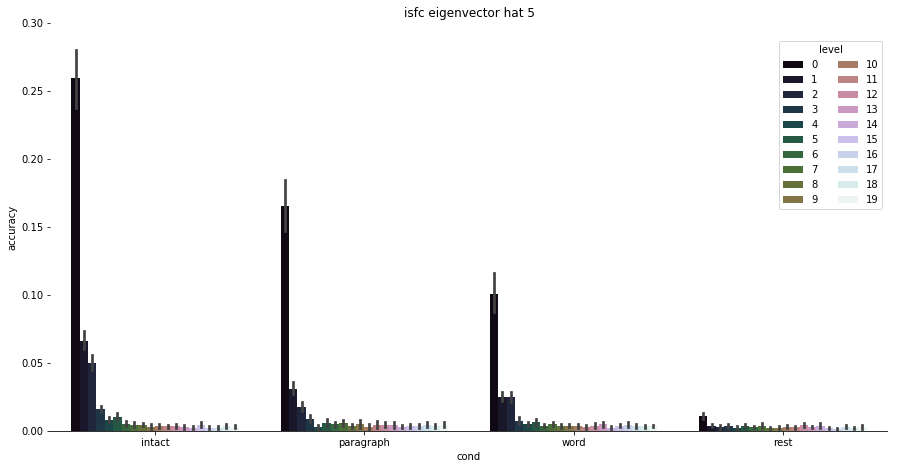

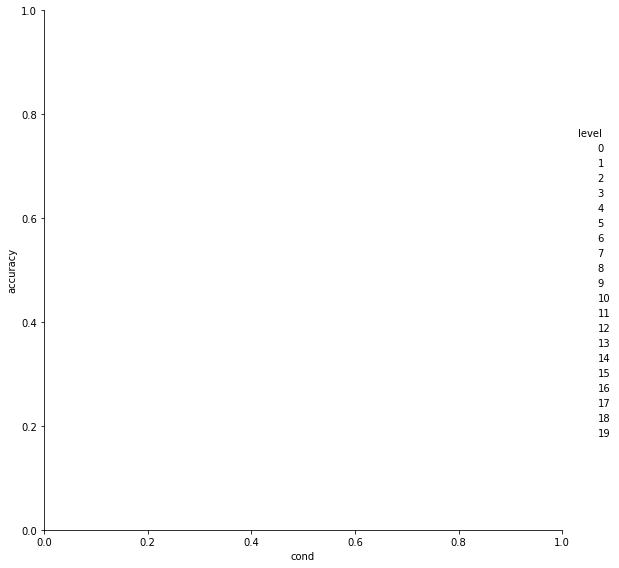

In [53]:
outfile = os.path.join(figdir, param_name + 'accuracy.png')
grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)